In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [78]:
house_rent_data = pd.read_csv("House_Rent_Dataset.csv")

In [79]:
house_rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [80]:
house_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [81]:
house_rent_data.duplicated().sum()

0

In [82]:
house_rent_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [83]:
# Rename columns
house_rent_data.columns = ['Posted_On', 'BHK', 'Rent', 'Size', 'Floor', 'Area_Type',
       'Area_Locality', 'City', 'Furnishing_Status', 'Tenant_Preferred',
       'Bathroom', 'Point_Contact']

In [84]:
# summary statistics
house_rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


<AxesSubplot:>

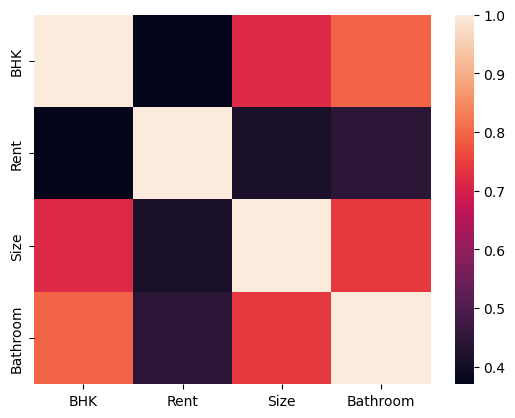

In [85]:
sns.heatmap(house_rent_data.corr())

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

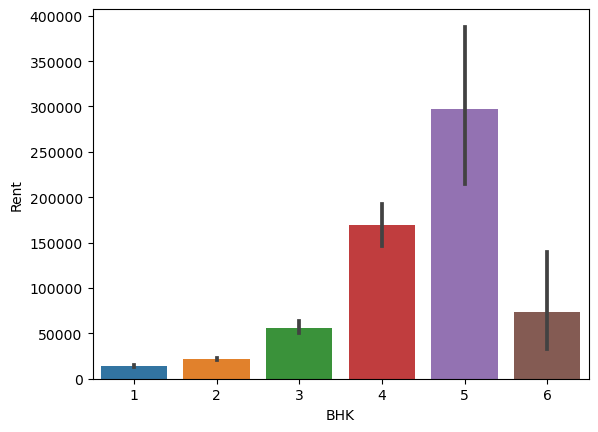

In [86]:
# Rent distribution for different houses with different bedrooms
sns.barplot(x = house_rent_data['BHK'], y = house_rent_data['Rent'], data = house_rent_data)

In [87]:
# Mean rent for different houses with various bedrooms
mean_rent=house_rent_data.groupby('BHK')['Rent'].mean().sort_values()
print(mean_rent)

BHK
1     14139.223650
2     22113.864018
3     55863.062842
6     73125.000000
4    168864.555556
5    297500.000000
Name: Rent, dtype: float64


It looks like houses that have 4 or 5 rooms are higher rent prices than 6.
6 bedroom houses can be out of the City or not big as 4 and 5 bedroom houses.

<AxesSubplot:xlabel='BHK', ylabel='Size'>

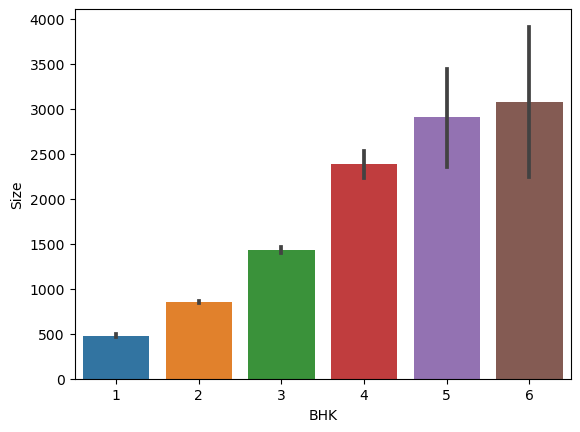

In [88]:
sns.barplot(x = house_rent_data['BHK'], y = house_rent_data['Size'], data = house_rent_data)

In [89]:
mean_size=house_rent_data.groupby('BHK')['Size'].mean().sort_values()
print(mean_size)

BHK
1     478.907455
2     852.072848
3    1432.367031
4    2382.190476
5    2910.947368
6    3075.000000
Name: Size, dtype: float64


<AxesSubplot:>

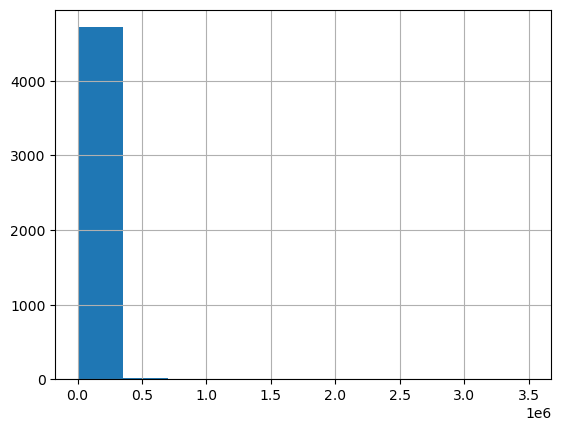

In [90]:
# Rent distibution
house_rent_data['Rent'].hist()

Data is skewed to the right

<AxesSubplot:xlabel='Rent'>

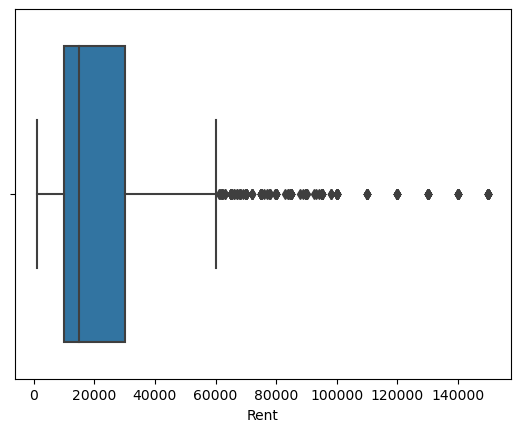

In [91]:
sns.boxplot(x = house_rent_data['Rent'][house_rent_data['Rent'] <= 150000])

So the average of rent is between 10000 to 30000


In [92]:
# lets find the mean of the rent for every cities
mean_city = house_rent_data.groupby('City')['Rent'].mean().sort_values()
print(mean_city)

City
Kolkata      11645.173664
Hyderabad    20555.048387
Chennai      21614.092031
Bangalore    24966.365688
Delhi        29461.983471
Mumbai       85321.204733
Name: Rent, dtype: float64


<AxesSubplot:xlabel='City'>

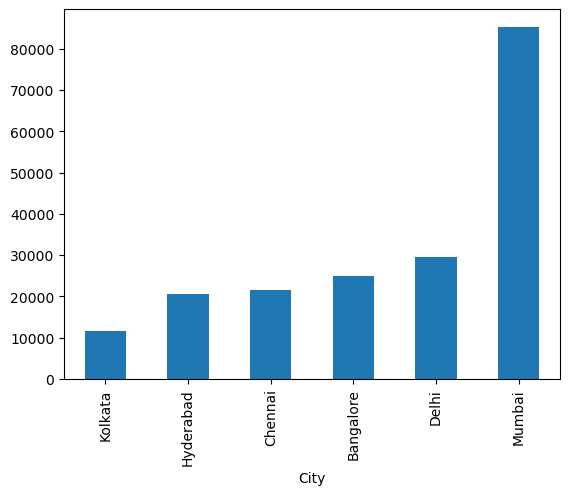

In [93]:
mean_city.plot(kind="bar")

In [94]:
# drop unused columns
house_rent_data.drop(["Posted_On"], axis=1, inplace=True)
house_rent_data.drop(["Area_Locality"], axis=1, inplace=True)

In [95]:
house_rent_data.shape

(4746, 10)

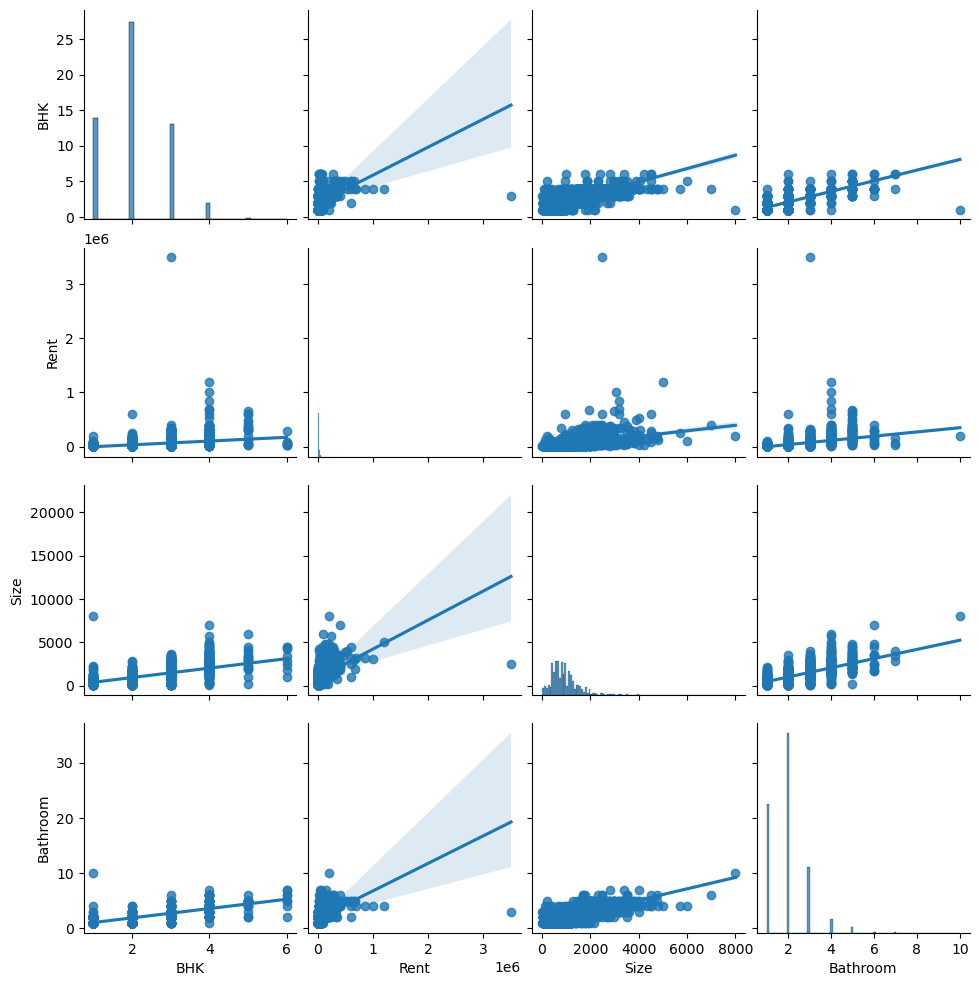

In [96]:
# scatter plot 
sns.pairplot(house_rent_data, kind="reg")

In [97]:
# label encoding categorical variables
house_rent_data.Floor.value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [98]:
house_rent_data["Floor_Number"] = house_rent_data["Floor"].apply(lambda x:str(x).split()[0])

In [99]:
house_rent_data["Total_Floor"]=house_rent_data["Floor"].apply(lambda x:str(x).split()[-1])

In [100]:
house_rent_data["Floor_Number"] = house_rent_data["Floor_Number"].replace(['Ground'],0)

In [101]:
house_rent_data.drop(['Floor'],axis =1, inplace=True)

In [102]:
house_rent_data.Floor_Number.value_counts()

1        1161
2         945
0         927
3         512
4         272
5         164
6          93
7          74
10         67
8          66
9          65
12         47
11         43
15         41
14         34
18         26
Upper      23
17         22
16         21
19         16
13         15
20         12
25         12
Lower      11
23          9
24          6
21          6
30          5
34          4
28          4
35          3
65          3
22          3
26          3
32          3
60          3
27          3
40          2
53          2
45          2
36          2
48          2
29          1
49          1
50          1
39          1
46          1
41          1
44          1
33          1
37          1
47          1
43          1
76          1
Name: Floor_Number, dtype: int64

lower basement means "-2",and Upper basement is -1.

In [103]:
house_rent_data["Floor_Number"] = house_rent_data["Floor_Number"].replace(['Lower'],-2)
house_rent_data["Floor_Number"] = house_rent_data["Floor_Number"].replace(['Upper'],-1)

In [105]:
house_rent_data.Total_Floor.value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Total_Floor, Length: 67, dtype: int64

In [107]:
house_rent_data["Total_Floor"] = house_rent_data["Total_Floor"].replace(['Ground'],1)

<AxesSubplot:xlabel='Area_Type'>

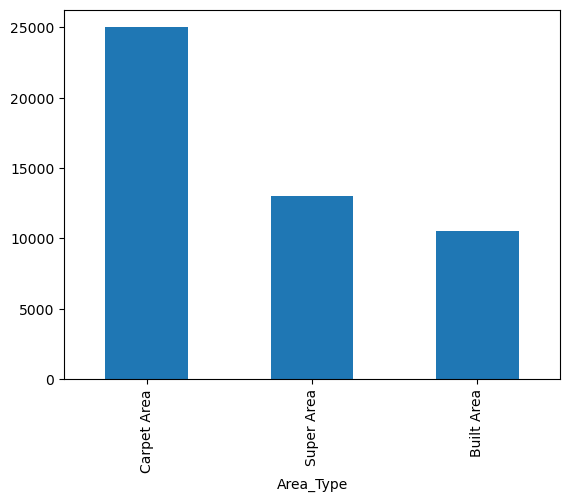

In [109]:
house_rent_data.groupby('Area_Type')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [110]:
means_Area = house_rent_data.groupby('Area_Type')['Rent'].mean()
print(means_Area)

Area_Type
Built Area     10500.000000
Carpet Area    52385.897302
Super Area     18673.396566
Name: Rent, dtype: float64


We have 3 values in the "Area Type" column. From now on Super Area =0, Carpet Area= 1, Built Area =2.

In [112]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
house_rent_data["Area_Type"]= label_encoder.fit_transform(house_rent_data["Area_Type"])
  
house_rent_data["Area_Type"].unique()

array([2, 1, 0])

<AxesSubplot:xlabel='Furnishing_Status'>

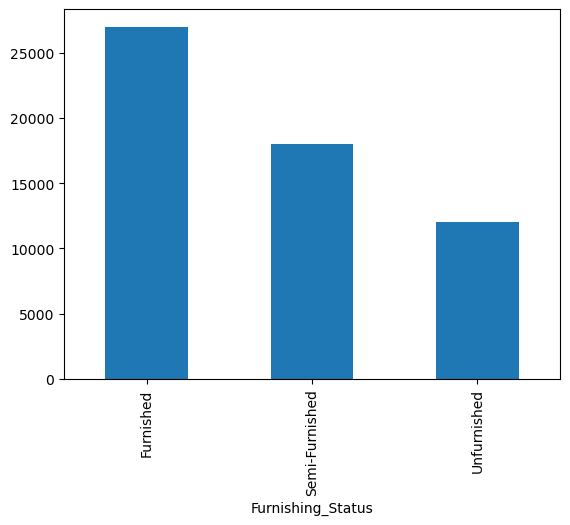

In [113]:
house_rent_data.groupby('Furnishing_Status')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [114]:
# Encode labels in column "Area Type".
house_rent_data["Furnishing_Status"]= label_encoder.fit_transform(house_rent_data["Furnishing_Status"])
  
house_rent_data["Furnishing_Status"].unique()

array([2, 1, 0])

<AxesSubplot:xlabel='Tenant_Preferred'>

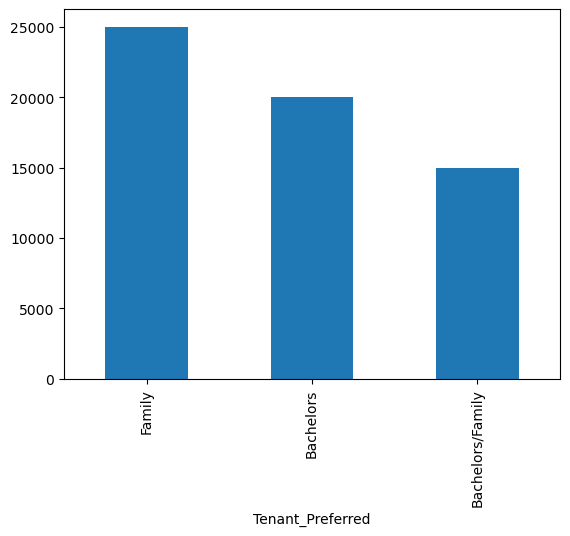

In [115]:
house_rent_data.groupby("Tenant_Preferred")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [116]:
# Encode labels in column "Area Type".
house_rent_data["Tenant_Preferred"]= label_encoder.fit_transform(house_rent_data["Tenant_Preferred"])
  
house_rent_data["Tenant_Preferred"].unique()

array([1, 0, 2])

In [117]:
# Encode labels in column "Area Type".
house_rent_data["Point_Contact"]= label_encoder.fit_transform(house_rent_data["Point_Contact"])
  
house_rent_data["Point_Contact"].unique()

array([2, 0, 1])

<AxesSubplot:xlabel='City'>

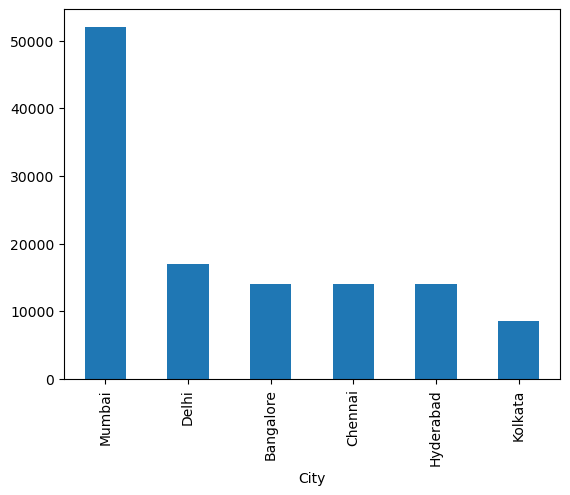

In [118]:
house_rent_data.groupby("City")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [138]:
# Encode labels in column "Area Type".
house_rent_data['City']= label_encoder.fit_transform(house_rent_data['City'])
  
house_rent_data['City'].unique()

array([4, 5, 0, 2, 1, 3], dtype=int64)

In [139]:
house_rent_data.describe()

,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_Contact
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,0.009659,0.119836,1.514960,2.457016,1.239149,0.924568,1.965866,1.355457
std,0.832256,0.022324,0.079375,0.500671,1.787188,0.684553,0.518366,0.884532,0.934678
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.002515,0.067584,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,0.004230,0.105131,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,0.009089,0.148936,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000
max,6.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,10.000000,2.000000


In [141]:
house_rent_data.to_csv('housing_rent_data.csv')

In [122]:
#min-max scale
from sklearn.preprocessing import minmax_scale

house_rent_data["Rent"] = minmax_scale(house_rent_data["Rent"])

In [123]:
house_rent_data["Size"] = minmax_scale(house_rent_data["Size"])

In [127]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

c:\Users\jumag\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [128]:
X=house_rent_data.drop('Rent',axis=1)
y=house_rent_data['Rent']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [129]:
models = {
    'Linear' : LinearRegression(),
    'ridge' : Ridge(),
    'xgboost' : XGBRegressor(),
    'catboost' : CatBoostRegressor(verbose=0),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4)
}

In [130]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')
    

Linear trained
ridge trained
xgboost trained
catboost trained
lightgbm trained
gradient boosting trained
lasso trained
random forest trained
bayesian ridge trained
support vector trained
knn trained


In [131]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv= kf)))
    results[name] = result

In [133]:
# calculating mean square error for all the models
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

Linear : 0.016
ridge : 0.016
xgboost : 0.02
catboost : 0.018
lightgbm : 0.014
gradient boosting : 0.017
lasso : 0.02
random forest : 0.017
bayesian ridge : 0.016
support vector : 0.087
knn : 0.017


In [134]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,support vector,lasso,xgboost,catboost,gradient boosting,random forest,knn,Linear,ridge,bayesian ridge,lightgbm
RMSE,0.086939,0.020245,0.019549,0.017506,0.017486,0.017372,0.017204,0.016049,0.016048,0.016037,0.014156


In [135]:
from sklearn.ensemble import VotingRegressor
estimators=[('lr',LinearRegression()),('lgbm',LGBMRegressor())]
vc=VotingRegressor(estimators=estimators)
x=cross_val_score(vc,X_train,y_train,cv=10,scoring='r2')
print(np.round(np.mean(x),2))

0.58


In [136]:
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lgbm', LGBMRegressor())])

In [137]:
pred_y=vc.predict(X_test)
print(r2_score(np.exp(y_test),np.exp(pred_y)))

0.5998697162939679
